<center><h2> Gaussian model to detect anomalous behavior in a 2D dataset </h2></center>

Anomaly detection tests a new example against the behavior of other examples in that range. This idea is often used in fraud detection, manufacturing or monitoring of machines. It is always useful if the goal is to detect certain outliners.

### Gaussian(Normal) Distribution

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Empirical_Rule.PNG/450px-Empirical_Rule.PNG "Logo Title Text 1")


Using a Gaussian distribution algorithm implies that the example x is distributed with a mean Mu and variance Sigma squared.

![alt text](images/normal-1d.png)

## Multivariate Normal Distribution

- Multivariate Gaussian Distribution, an enhanced model of Gaussian distribution to illustrate the correlation between x1 and x2.

- A multivariat Gaussian distribution calculates the probability model of x at once, instead of modelling the probabilities for each feature alone. It uses a covariance matrix instead of Sigma squared.

### Some examples of multi-normal

![alt text](images/multi_normal_ex2.png)

#### As the non-primary diagonal magnitude increases the normal-distribution becomes more elleptical


### Changing mean with constant covariance
![alt text](images/multinormal_changing_mean.png)




## The algorithm for multi-normal anomaly detection

![alt text](images/algo.png)


In [1]:
%reset -f
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math

In [2]:
def estimate_gaussian(X):
    mu = np.mean(X, axis =0)
    sigma2 = np.var(X, axis =0)
    return mu, sigma2

def multivariate_gaussian(x, mu, cov):
    #Calculation of multivariate guassian pdf
    #x is the point, mu: list mean of all fields, 
    #cov: covariance matrix
    
    size = len(x)
    if size == len(mu) and (size, size) == cov.shape:
        det = np.linalg.det(cov)
        if det == 0:
            raise NameError("The covariance matrix can't be singular")
        
        norm_const = 1.0/ ( math.pow((2*np.pi),float(size)/2) * math.pow(det,1.0/2) )
        x_mu = np.matrix(x - mu)
        inv = np.linalg.inv(cov)
        result = math.pow(math.e, -0.5 * (x_mu * inv * x_mu.T))
        return norm_const * result
    else:
        raise NameError("The dimensions of the input don't match")   

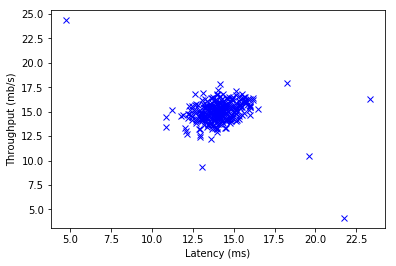

In [3]:
df = pd.read_csv('X.csv')
#name of first column/component
comp1 = 'Latency (ms)'
#name of second component
comp2 = 'Throughput (mb/s)'

plt.plot(df.loc[:, comp1], df.loc[:, comp2], 'bx')
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)');
plt.show()

In [4]:
df

,Latency (ms),Throughput (mb/s)
0,13.046815,14.741152
1,13.408520,13.763270
2,14.195915,15.853181
3,14.914701,16.174260
4,13.576700,14.042849
5,13.922403,13.406469
6,12.822132,14.223188
7,15.676366,15.891691
8,16.162875,16.202998
9,12.666451,14.899084


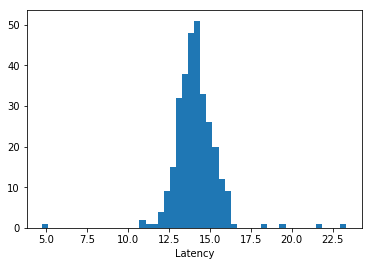

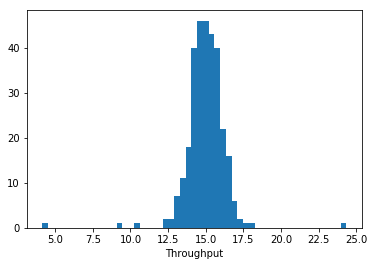

In [5]:
#checking for normal distribution
plt.hist(df.loc[:,comp1],bins = 'auto')
plt.xlabel('Latency')
plt.show()

plt.hist(df.loc[:,comp2],bins = 'auto')
plt.xlabel('Throughput')
plt.show()

In [6]:
mu, sigma2 = estimate_gaussian(df)
covariance = np.cov(df.loc[:,comp1], df.loc[:,comp2])

df['pdf'] = np.nan
for y in range(len(df)):
    temp = [df.loc[y,comp1], df.loc[y,comp2]]
    df.loc[y,'pdf'] = multivariate_gaussian(temp,mu,covariance)

In [7]:
df

,Latency (ms),Throughput (mb/s),pdf
0,13.046815,14.741152,6.346133e-02
1,13.408520,13.763270,4.706432e-02
2,14.195915,15.853181,7.222458e-02
3,14.914701,16.174260,4.681504e-02
4,13.576700,14.042849,6.136206e-02
5,13.922403,13.406469,4.131797e-02
6,12.822132,14.223188,4.436704e-02
7,15.676366,15.891691,3.271507e-02
8,16.162875,16.202998,1.531845e-02
9,12.666451,14.899084,5.002694e-02


In [8]:
# choosing a probability below which we consider it as anomaly
df_outlier = df[df.pdf <= 9e-5]
df_outlier

,Latency (ms),Throughput (mb/s),pdf
300,13.079310,9.347878,3.413349e-06
301,21.727134,4.126232,2.641222e-21
303,19.582573,10.411619,2.857102e-07
304,23.339868,16.298874,1.349858e-12
305,18.261188,17.978309,2.243722e-05
306,4.752613,24.350407,9.347049e-21


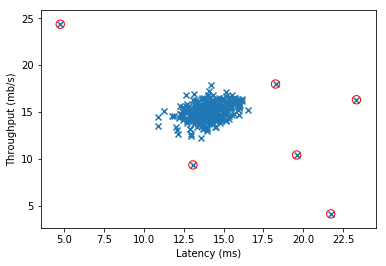

In [9]:
# plot the data
plt.scatter(df.loc[:,comp1], df.loc[:,comp2],marker="x")

# Circling of anomalies
plt.scatter(df_outlier.loc[:,comp1], df_outlier.loc[:,comp2],marker ="o",facecolor="none",edgecolor="r",s=70)
plt.xlabel("Latency (ms)")
plt.ylabel("Throughput (mb/s)")

plt.show()

## Contour Diagrams

- The probability along a curve is same
- Same coloured portion have equal probability (pdf)

![alt text](images/contour.png)

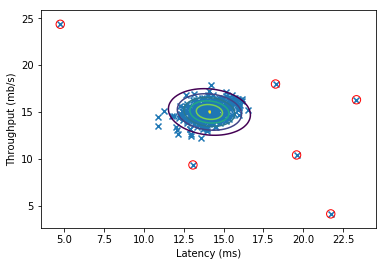

In [10]:
xlist = np.linspace(df[comp1].min(), df[comp1].max(), num=100)
ylist = np.linspace(df[comp1].min(), df[comp1].max(), num=100)
xx, yy = np.meshgrid(xlist, ylist) 
plt.figure()

zz = np.zeros(xx.shape)
for i in range(xx.shape[0]):
    for j in range(yy.shape[1]):
        zz[i,j] = multivariate_gaussian([xx[i,j], yy[i,j]],mu,covariance)
        

# plot the data
plt.scatter(df.loc[:,comp1], df.loc[:,comp2],marker="x")

# Circling of anomalies
plt.scatter(df_outlier.loc[:,comp1], df_outlier.loc[:,comp2],marker ="o",facecolor="none",edgecolor="r",s=70)
plt.xlabel("Latency (ms)")
plt.ylabel("Throughput (mb/s)")

plt.contour(xx, yy, zz)
plt.show()